# Dauer des Entscheidungsprozesses

In der nachfolgenden Analyse soll ein genauerer Blick auf die Dauer des Entscheidungsprozesses geworfen werden.

Folgende Spalten werden für die Analyse der Dauer benötigt:
- case_status
- case_received_date
- decision_date

Anschließend soll ein Bezug zum prevailing wage der Bewerber hergestellt werden, mit den Spalten:
- prevailing_wage_amount_9089
- prevailing_wage_unit_of_pay_9089

In [110]:
import cleanup
import pandas as pd
import modules
import matplotlib.pyplot as plt
plt.style.use('../own_style.mplstyle')
from scipy.stats import linregress

In [111]:
# Falls der bereinigte Datensatz noch nicht vorliegt:
#cleanup.generate_cleaned_df("../data/us_perm_visas.csv", "../data/")

In [112]:
col_list = ["case_status", "case_received_date", "decision_date", "prevailing_wage_amount_9089", "prevailing_wage_unit_of_pay_9089"]
visas_df = pd.read_csv('../data/us_perm_visas_cleaned.csv', usecols=col_list)

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [113]:
visas_df.head()

,case_received_date,decision_date,case_status,prevailing_wage_amount_9089,prevailing_wage_unit_of_pay_9089
0,NaN,2012-02-01,Certified,75629.00,yr
1,NaN,2011-12-21,Denied,37024.00,yr
2,NaN,2011-12-01,Certified,47923.00,yr
3,NaN,2011-12-01,Certified,10.97,hr
4,NaN,2012-01-26,Certified,94890.00,yr


Wie viele Daten sind in den verschiedenen Spalten vorhanden? Dafür nutzen wir die Funktion `print_count_of_values_relation` aus der modules.py.

case_received_date
239091/374362 64%
Filled: |███████████████████████████████-------------------| 63.9% Rows

decision_date
374362/374362 100%
Filled: |██████████████████████████████████████████████████| 100.0% Rows

case_status
374362/374362 100%
Filled: |██████████████████████████████████████████████████| 100.0% Rows

prevailing_wage_amount_9089
372146/374362 99%
Filled: |█████████████████████████████████████████████████-| 99.4% Rows

prevailing_wage_unit_of_pay_9089
372790/374362 100%
Filled: |█████████████████████████████████████████████████-| 99.6% Rows



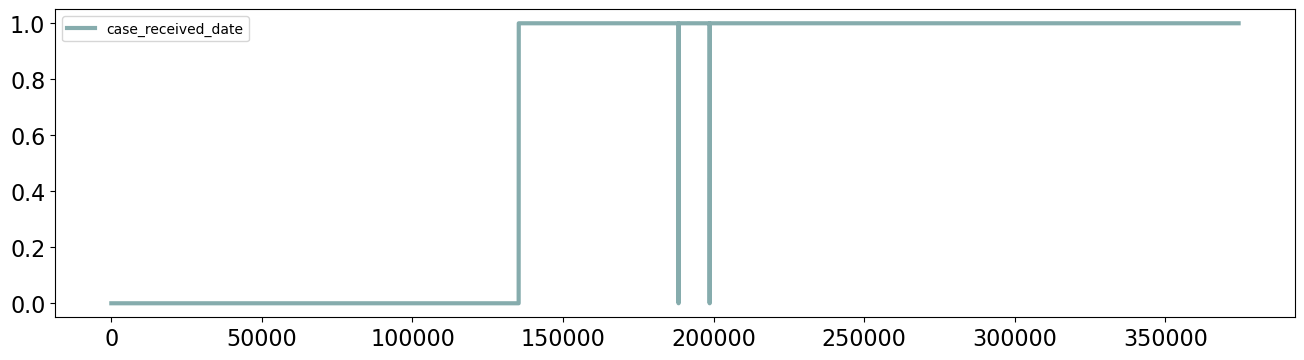

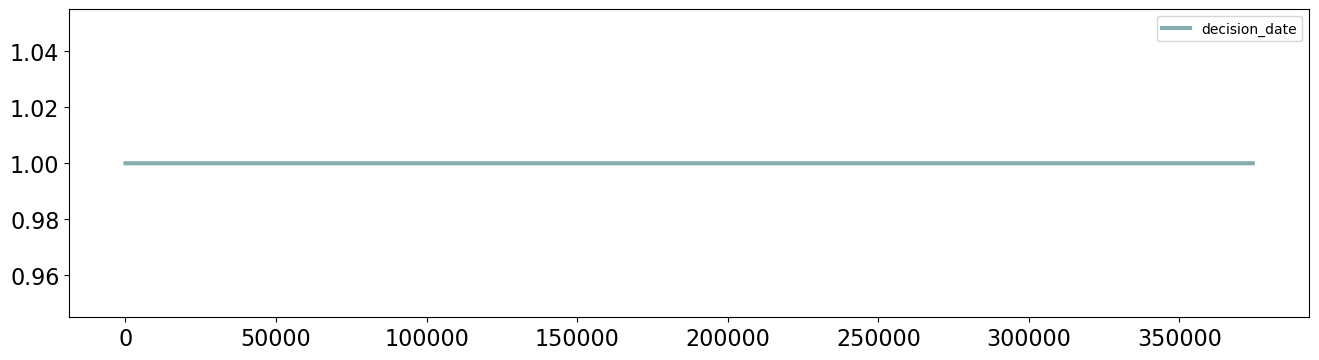

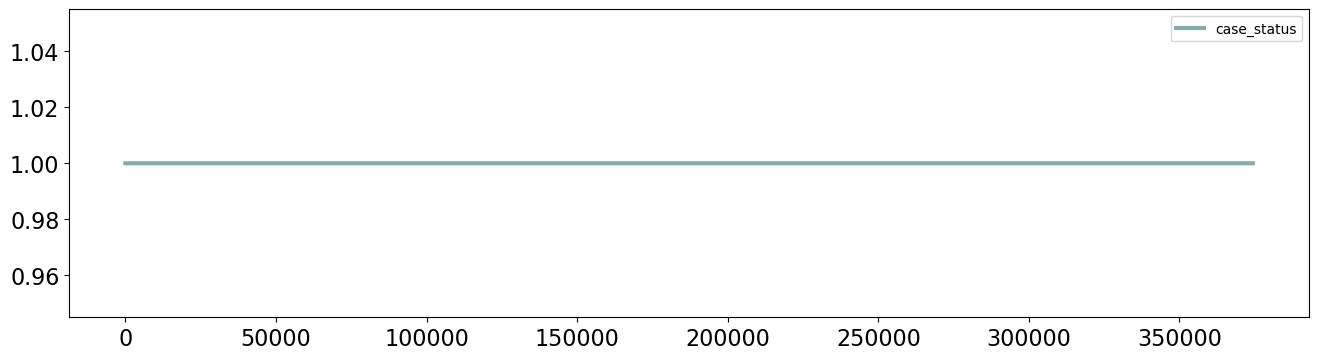

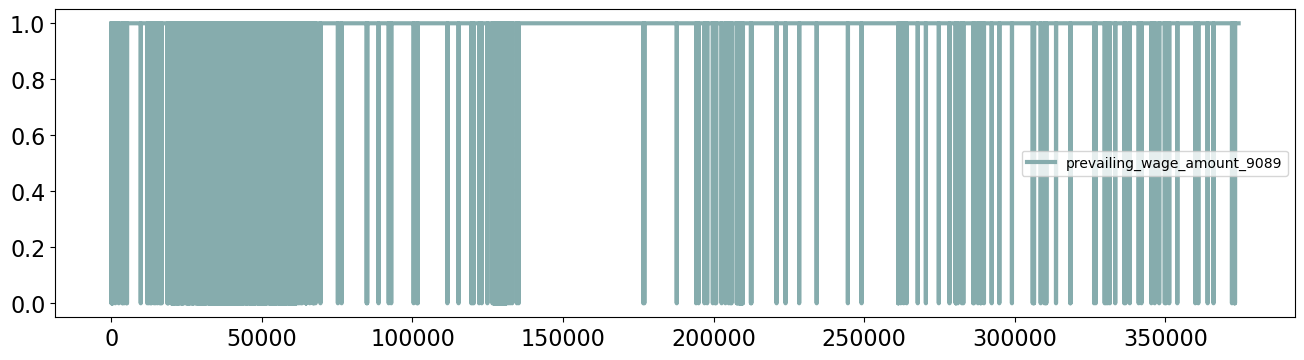

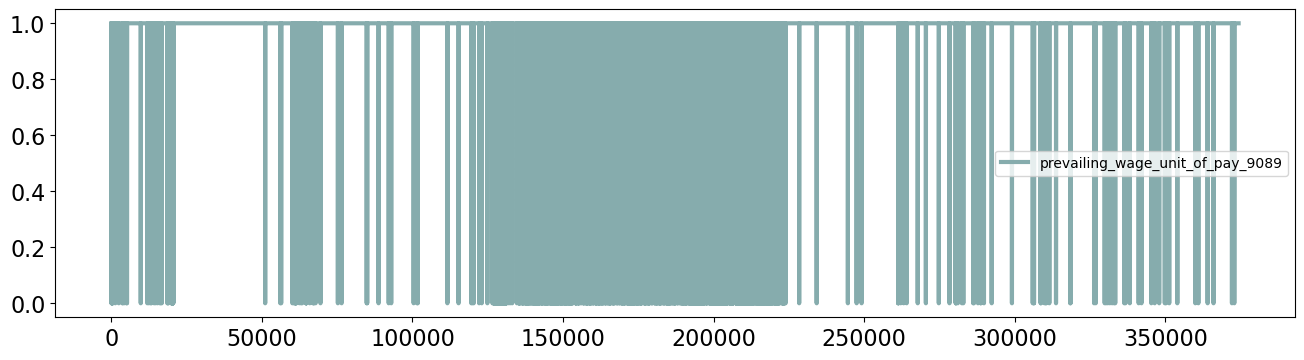

In [114]:
modules.print_count_of_values_relation(visas_df, True, True)

Im Großen und Ganzen liegen in den Spalten nahezu vollständige Daten vor. Einzig die Spalte `case_received_date` ist nur zu 64% befüllt.
Da diese 64% jedoch 239.091 Datensätze ausmachen, sind genügend Datensätze für eine Analyse vorhanden.

## Es soll kurz noch auf die einzelnen Spalten eingegangen werden.

In [115]:
visas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374362 entries, 0 to 374361
Data columns (total 5 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   case_received_date                239091 non-null  object 
 1   decision_date                     374362 non-null  object 
 2   case_status                       374362 non-null  object 
 3   prevailing_wage_amount_9089       372146 non-null  float64
 4   prevailing_wage_unit_of_pay_9089  372790 non-null  object 
dtypes: float64(1), object(4)
memory usage: 14.3+ MB


### case_status

<AxesSubplot:ylabel='case_status'>

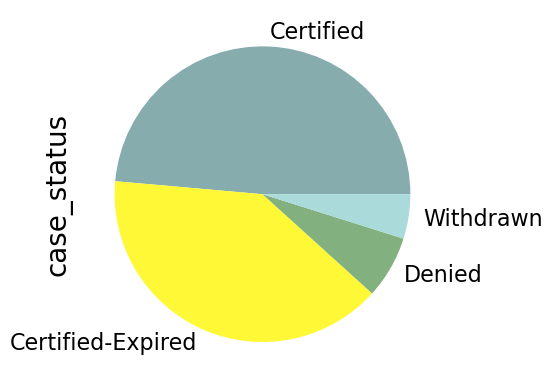

In [116]:
visas_df["case_status"].value_counts().plot(kind="pie")

Bei der Spalte 'case_status' handelt es sich um eine kategoriale Variable, welche bereits sehr gut bereinigt vorliegt.

### case_received_date und decision_date

In [117]:
visas_df['case_received_date'].value_counts()

2014-06-30    767
2015-09-30    696
2015-06-30    695
2015-06-29    691
2016-06-29    670
             ... 
2008-11-13      1
2010-11-17      1
2009-09-22      1
2009-04-14      1
2011-01-16      1
Name: case_received_date, Length: 2180, dtype: int64

In [118]:
visas_df['decision_date'].value_counts()

2015-11-19    1981
2015-11-20    1165
2015-09-18    1113
2015-12-07    1088
2015-08-28    1064
              ... 
2014-03-30       1
2014-05-04       1
2014-05-17       1
2016-06-25       1
2014-08-10       1
Name: decision_date, Length: 1450, dtype: int64

Der Datentyp der Datumsspalten ist noch Object. Diesen wandeln wir nun bei beiden Spalten in DateTime um.

In [119]:
visas_df['case_received_date'] = pd.to_datetime(visas_df['case_received_date'])

In [120]:
visas_df['decision_date'] = pd.to_datetime(visas_df["decision_date"])

In [121]:
visas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374362 entries, 0 to 374361
Data columns (total 5 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   case_received_date                239091 non-null  datetime64[ns]
 1   decision_date                     374362 non-null  datetime64[ns]
 2   case_status                       374362 non-null  object        
 3   prevailing_wage_amount_9089       372146 non-null  float64       
 4   prevailing_wage_unit_of_pay_9089  372790 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 14.3+ MB


Nun wird noch ein kurzer Blick auf die Plausibilität der in dem Datumsspalten enthaltenen Werte geworfen.


In [122]:
visas_df['case_received_date'].nsmallest(10)


135468   2006-06-21
244931   2007-07-06
252985   2007-07-20
371796   2007-08-17
135482   2007-09-04
218244   2007-10-19
329959   2007-11-15
135489   2007-12-07
250909   2007-12-07
239942   2007-12-26
Name: case_received_date, dtype: datetime64[ns]

In [123]:
visas_df['case_received_date'].nlargest(10)

374358   2016-12-30
374359   2016-12-30
374360   2016-12-30
374361   2016-12-30
374152   2016-12-29
374153   2016-12-29
374357   2016-12-29
373698   2016-12-28
373742   2016-12-28
373743   2016-12-28
Name: case_received_date, dtype: datetime64[ns]

In [124]:
visas_df['decision_date'].nsmallest(10)

111    2011-10-03
756    2011-10-03
898    2011-10-03
980    2011-10-03
1010   2011-10-03
1011   2011-10-03
1226   2011-10-03
1439   2011-10-03
1489   2011-10-03
1602   2011-10-03
Name: decision_date, dtype: datetime64[ns]

In [125]:
visas_df['decision_date'].nlargest(10)

356130   2016-12-30
357657   2016-12-30
374102   2016-12-30
374114   2016-12-30
374134   2016-12-30
374154   2016-12-30
374155   2016-12-30
374156   2016-12-30
374157   2016-12-30
374158   2016-12-30
Name: decision_date, dtype: datetime64[ns]

Die Werte sehen plausibel aus.

# Die Dauer der Entscheidungsfindung

Auf der Seite des auswärtigen Amtes wird zur Dauer des Visa Prozesses folgendendes aufgeführt:
"Applications for visas entitling the holder to a longer stay or to take up gainful employment may take several months to process."
https://www.auswaertiges-amt.de/en/einreiseundaufenthalt/visabestimmungen-node#content_5

Um die Dauer der Entscheidungsfindung zu ermitteln subtrahieren wir vom Tag der Entscheidung, den Tag des Antrageingangs.

In [126]:
visas_df['duration_of_decision'] = visas_df['decision_date']-visas_df['case_received_date']

In [127]:
visas_df[['decision_date','case_received_date','duration_of_decision']].sample(20)

,decision_date,case_received_date,duration_of_decision
48226,2013-04-15,NaT,NaT
288148,2016-04-13,2015-11-24,141 days
122594,2014-07-10,NaT,NaT
138500,2015-03-04,2013-07-03,609 days
34020,2013-02-06,NaT,NaT
352310,2016-10-12,2016-07-28,76 days
233126,2015-11-06,2015-04-22,198 days
1981,2011-10-20,NaT,NaT
121237,2014-04-22,NaT,NaT
129278,2014-04-08,NaT,NaT


In der neu berechneten Splate `duration_of_decision` befinden sich nun mehrere NaT Werte.
Diese treten immer auf, sobald bei `case_received_date` zum Zeitpunkt der Berechnung kein Wert vorlag.
Alle Zeilen mit NaT Werten bei Spalte 'duration_of_decision` werden nun für die  nachfolgenden Analyse vom Datensatz entfernt.

In [128]:
visas_df.dropna(subset = ["duration_of_decision"], inplace=True)

In [129]:
visas_df[['decision_date','case_received_date','duration_of_decision']].sample(20)

,decision_date,case_received_date,duration_of_decision
280065,2016-03-21,2015-10-02,171 days
353874,2016-10-17,2016-07-28,81 days
167762,2015-09-01,2014-06-30,428 days
170052,2015-05-20,2014-05-22,363 days
213611,2014-11-07,2014-06-18,142 days
233761,2015-11-13,2015-11-06,7 days
165167,2014-12-12,2014-07-16,149 days
253202,2016-01-08,2015-07-14,178 days
352250,2016-10-12,2016-07-22,82 days
325738,2016-07-21,2016-04-04,108 days


In [130]:
visas_df["duration_of_decision"].size

239091

In [131]:
visas_df["decision_date"].dt.year.value_counts()

2016    124230
2015     96703
2014     18158
Name: decision_date, dtype: int64

Um Berechnungen zu vereinfachen, werden wir die in Spalte `duration_of_decision` enthaltenen Werte zu int Werten umwandeln.

In [132]:
visas_df['duration_of_decision'] = visas_df['duration_of_decision'].dt.days

In [133]:
visas_df['duration_of_decision']

135269    556
135270    591
135271    323
135272    559
135273    591
         ... 
374357      1
374358      0
374359      0
374360      0
374361      0
Name: duration_of_decision, Length: 239091, dtype: int64

In [134]:
visas_df.groupby('case_status')['duration_of_decision'].mean().sort_values()

case_status
Withdrawn            105.814246
Certified            172.393605
Certified-Expired    222.298922
Denied               517.754714
Name: duration_of_decision, dtype: float64

In [135]:
visas_df.groupby('case_status')['duration_of_decision'].describe()

,count,mean,std,min,25%,50%,75%,max
case_status,,,,,,,,
Certified,120969.0,172.393605,150.296833,3.0,87.0,125.0,202.0,3082.0
Certified-Expired,95570.0,222.298922,136.983325,79.0,150.0,173.0,198.0,2852.0
Denied,12781.0,517.754714,505.650797,0.0,201.0,399.0,631.0,3413.0
Withdrawn,9771.0,105.814246,168.466313,0.0,1.0,29.0,146.0,3092.0


Es ist festzuhalten, dass starke Unterschiede in der Bearbeitungsdauer vorliegen, je nachdem, ob der Antrag zurückgezogen, stattgegeben, stattgegeben und verfallen oder abgelehnt wurde.
So bedarfen zurückgezogene Anträge die kürzeste Bearbeitungsdauer. Dies ist insofern verständlich, dass der Rückzug eines Antrages immer vor der eigentlichen Entscheidung über den Antrag erfolgen müsste.

Ebenso müsste der Status stattgegeben und verfallen zeitlich später, als der Status stattgegeben eintreten.

Mit Abstand am längsten dauert es bis zum Ablehnnung des Antrages.

Die Analyse beginnt mit der Untersuchung zeitlicher Zusammenhänge über die Jahre hinweg. Konkret soll festgestellt werden, ob es regelmäßige Hochs und Tiefs gibt (z.B. dadurch, dass um die Weihnachtszeit Anträge liegenbleiben, werden im Januar viele Anträge mit einer längeren Bearbeitungsdauer fertiggestellt).

Dafür bilden wir je Monat einen Medianwert. Ebenfalls wird die Pivot-Funktion von Pandas genutzt um für jedes Entscheidungsjahr eine eigene Spalte in einem DateFrame zu hinterlegen.

In [136]:
duration_per_month_and_year_df = pd.pivot_table(visas_df, index=visas_df['decision_date'].dt.month, columns=visas_df['decision_date'].dt.year,
                    values='duration_of_decision', aggfunc='mean')
duration_per_month_and_year_df
duration_per_month_and_year_df = duration_per_month_and_year_df.rename_axis(None)

<ipython-input-137-5b1d394d4c16>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


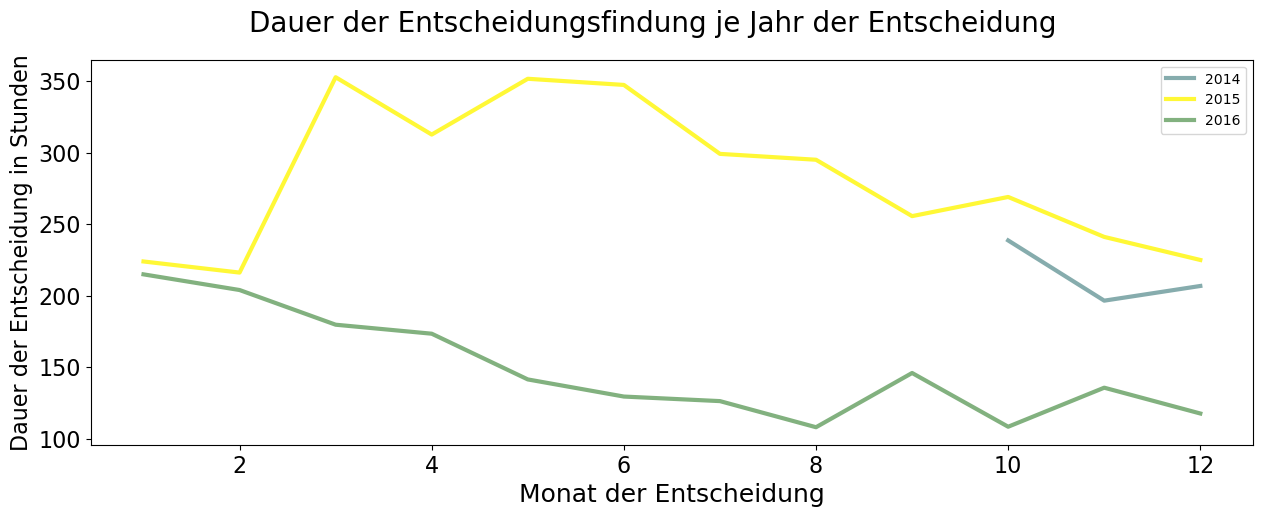

In [137]:
fig, axes = plt.subplots(figsize=(15,5))

axes.plot(duration_per_month_and_year_df)
fig.suptitle('Dauer der Entscheidungsfindung je Jahr der Entscheidung', fontsize=20)
axes.set_xlabel('Monat der Entscheidung', fontsize=18)
axes.set_ylabel('Dauer der Entscheidung in Stunden', fontsize=16)
axes.legend(['2014','2015', '2016'],loc='upper right')
#axes.legend(loc="upper right")
fig.show()

In der Grafik ist abzulesen, dass die Dauer der Entscheidungsfindung 2016 im Gegensatz zu 2015 abgenommen hat.
Es lassen sich auf Monatsebene keine Zusammenhänge zwischen den verschiedenen Jahren feststellen.

Als nächstes soll sich die Analyse der generellen Entwicklung der Bearbeitungsdauer widmen.

Wie hat sich die Bearbeitungsdauer über die Zeit entwicklelt?
Erfolgt die Zertifizierung mittlerweile schneller?

In [138]:
visas_df["decision_date_month"] = visas_df["decision_date"].dt.strftime('%Y-%m')
visas_df["decision_date_month"]

135269    2015-05
135270    2015-06
135271    2014-10
135272    2015-05
135273    2015-06
           ...   
374357    2016-12
374358    2016-12
374359    2016-12
374360    2016-12
374361    2016-12
Name: decision_date_month, Length: 239091, dtype: object

<AxesSubplot:title={'center':'Entwicklung der Bearbeitungsdauer in Stunden'}, xlabel='Datum der Bearbeitung', ylabel='Bearbeitungsdauer in Stunden'>

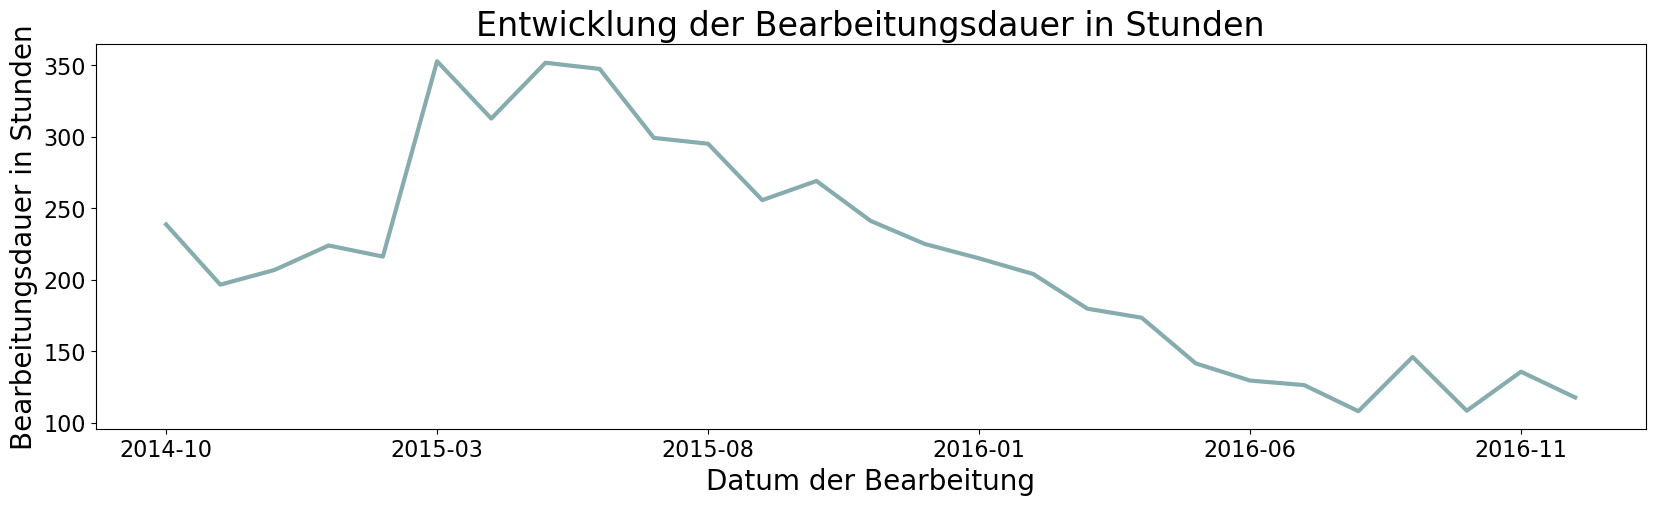

In [139]:
visas_df.groupby('decision_date_month')['duration_of_decision'].mean().plot(figsize=(20,5), xlabel="Datum der Bearbeitung", ylabel="Bearbeitungsdauer in Stunden", title="Entwicklung der Bearbeitungsdauer in Stunden")

Mitte 2015 gab es ein Peak in der Berarbeitungsdauer der Visaanträge. Im Jahr 2016 konnte die Bearbeitungsdauer dagegen stark gesenkt werden.

In [140]:
visas_df.groupby(['decision_date_month', 'case_status'])['duration_of_decision'].mean()

decision_date_month  case_status      
2014-10              Certified-Expired    202.553050
                     Denied               718.721881
                     Withdrawn            121.866492
2014-11              Certified-Expired    192.828480
                     Denied               428.487310
                                             ...    
2016-11              Denied               587.693201
                     Withdrawn             39.533074
2016-12              Certified             96.686538
                     Denied               385.917976
                     Withdrawn             45.093617
Name: duration_of_decision, Length: 83, dtype: float64

In [141]:
duration_per_month_and_year_status_df  = visas_df.groupby(['decision_date_month', 'case_status'])['duration_of_decision'].mean()

In [142]:
duration_per_month_and_year_status_df = duration_per_month_and_year_status_df.to_frame().unstack().rename_axis(None)

In [143]:
duration_per_month_and_year_status_df.columns = duration_per_month_and_year_status_df.columns.map('{0[1]}'.format)

<AxesSubplot:title={'center':'Entwicklung Bearbeitungsdauer je Bearbeitungsergebnis'}, xlabel='Jahr-Monat', ylabel='Bearbeitungsdauer'>

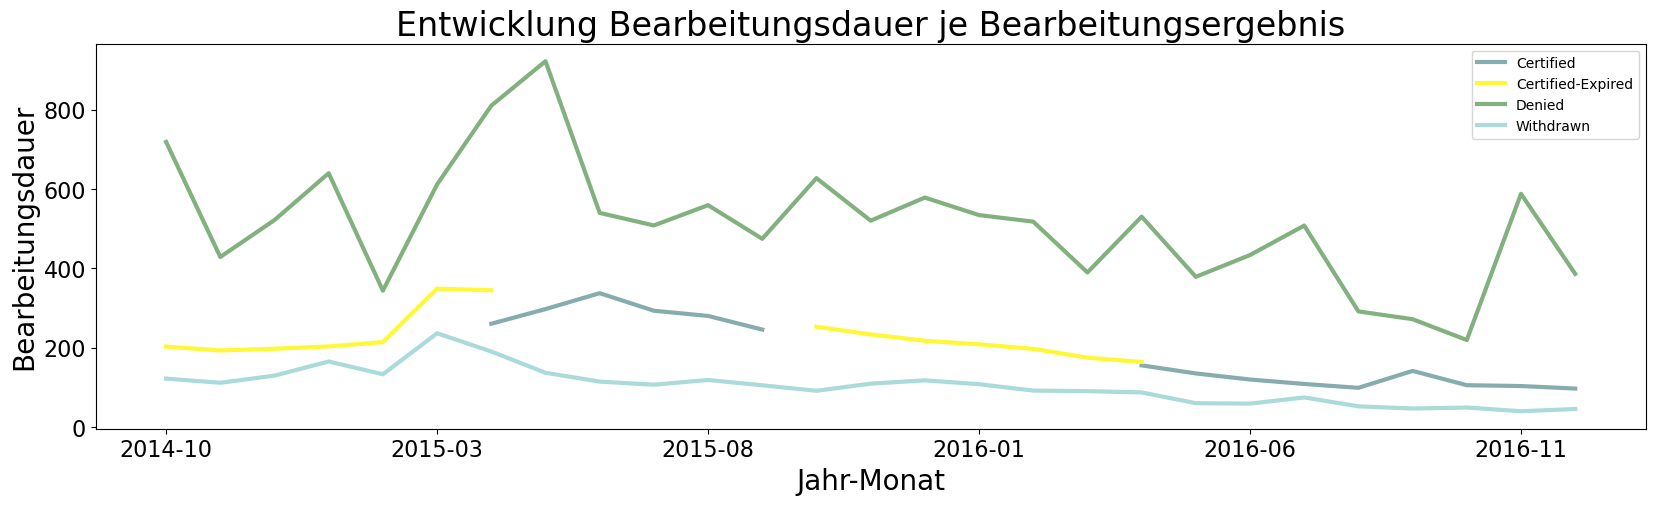

In [144]:
duration_per_month_and_year_status_df.plot(figsize=(20,5), xlabel="Jahr-Monat", ylabel="Bearbeitungsdauer",title="Entwicklung Bearbeitungsdauer je Bearbeitungsergebnis")

Während für Status "Withdrawn" und "Denied" durchgängig Datensätze vorliegen, ist dies bei "Certified" und "Certified-Expired" nicht der Fall.

## Werden Besserverdienende im Visaprozess durch eine schnellere Bearbeitungsdauer bevorzugt?

Arbeitnehmer mit höhrem Gehalt, könnten in den USA durch eine schnellere Bearbeitug bevorzugt werden.
Gründe dafür wären bespielsweise, dass Besserverdienende mehr zur wirtschaftlichen Leistung der USA beitragen können, als Geringverdiener.

Dies soll im Nachgang untersucht werden.

In [145]:
visas_df.head()

,case_received_date,decision_date,case_status,prevailing_wage_amount_9089,prevailing_wage_unit_of_pay_9089,duration_of_decision,decision_date_month
135269,2013-11-19,2015-05-29,Certified,83366.0,yr,556,2015-05
135270,2013-11-12,2015-06-26,Denied,16973.0,yr,591,2015-06
135271,2013-11-27,2014-10-16,Denied,49982.0,yr,323,2014-10
135272,2013-11-13,2015-05-26,Certified,43514.0,yr,559,2015-05
135273,2013-11-12,2015-06-26,Denied,16973.0,yr,591,2015-06


In [146]:
visas_df["prevailing_wage_unit_of_pay_9089"].value_counts()

yr     232819
hr       4851
wk         96
mth        52
bi         13
Name: prevailing_wage_unit_of_pay_9089, dtype: int64

Die Datensätze werden auf Datensätze mit einem prevailing wage auf Basis einer Jahreszahlung gefiltert.
Das Jahreswerte liegen mit der größten Anzahl vor und einheitliche Einheiten sind notwendig um die Datensätze vergleichen zu können.

In [147]:
wage_duration_df = visas_df[visas_df["prevailing_wage_unit_of_pay_9089"] == 'yr']

Zudem werden die zurückgezogenen und verfallenen Anträge aus dem Datensatz entfernt, da diese zu kurze oder zu lange Bearbeitungsdauern implizieren und damit das Analyseergebnis verfälschen.

In [148]:
wage_duration_df = wage_duration_df[wage_duration_df.case_status != 'Withdrawn']
wage_duration_df = wage_duration_df[wage_duration_df.case_status != 'Certified-Expired']
wage_duration_df.dropna(subset = ["prevailing_wage_amount_9089"], inplace=True)

In [149]:
wage_duration_df.sample(10)

,case_received_date,decision_date,case_status,prevailing_wage_amount_9089,prevailing_wage_unit_of_pay_9089,duration_of_decision,decision_date_month
354567,2016-08-23,2016-10-19,Certified,93517.0,yr,57,2016-10
340446,2016-06-15,2016-09-02,Certified,113526.0,yr,79,2016-09
140025,2013-06-10,2014-12-30,Denied,34154.0,yr,568,2014-12
344276,2016-06-15,2016-09-15,Certified,55973.0,yr,92,2016-09
348130,2016-07-06,2016-09-27,Certified,101941.0,yr,83,2016-09
305719,2016-02-01,2016-05-27,Certified,83741.0,yr,116,2016-05
214391,2014-10-22,2015-04-09,Certified,95181.0,yr,169,2015-04
358433,2016-08-18,2016-10-31,Certified,93517.0,yr,74,2016-10
220868,2014-11-25,2015-05-15,Certified,39499.0,yr,171,2015-05
332419,2016-08-09,2016-08-09,Denied,39707.0,yr,0,2016-08


In [150]:
wage_duration_df.prevailing_wage_amount_9089 = wage_duration_df.prevailing_wage_amount_9089.astype(int)

In [151]:
wage_duration_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129502 entries, 135269 to 374353
Data columns (total 7 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   case_received_date                129502 non-null  datetime64[ns]
 1   decision_date                     129502 non-null  datetime64[ns]
 2   case_status                       129502 non-null  object        
 3   prevailing_wage_amount_9089       129502 non-null  int32         
 4   prevailing_wage_unit_of_pay_9089  129502 non-null  object        
 5   duration_of_decision              129502 non-null  int64         
 6   decision_date_month               129502 non-null  object        
dtypes: datetime64[ns](2), int32(1), int64(1), object(3)
memory usage: 7.4+ MB


In [152]:
wage_duration_df.prevailing_wage_amount_9089.nlargest(10)


371525    7149000
305415    6431400
234182    6156800
273372    5172960
174452    5067600
286626    4500000
328973    4438700
208973     885666
198257     252637
324539     251909
Name: prevailing_wage_amount_9089, dtype: int32

In [153]:
wage_duration_df.prevailing_wage_amount_9089.nsmallest(10)

239416     2109
309809     2200
135415    13894
351084    15080
351800    16062
135282    16640
137999    16640
142019    16640
142110    16640
142113    16640
Name: prevailing_wage_amount_9089, dtype: int32

In [154]:
#https://nextjournal.com/schmudde/how-to-remove-outliers-in-data
wage_duration_df = wage_duration_df[wage_duration_df.prevailing_wage_amount_9089.between(wage_duration_df.prevailing_wage_amount_9089.quantile(.05), wage_duration_df.prevailing_wage_amount_9089.quantile(.95))] # without outliers

In [155]:
wage_duration_df["decision_year"] = wage_duration_df["decision_date"].dt.year

In [156]:
plt.style.use('default')

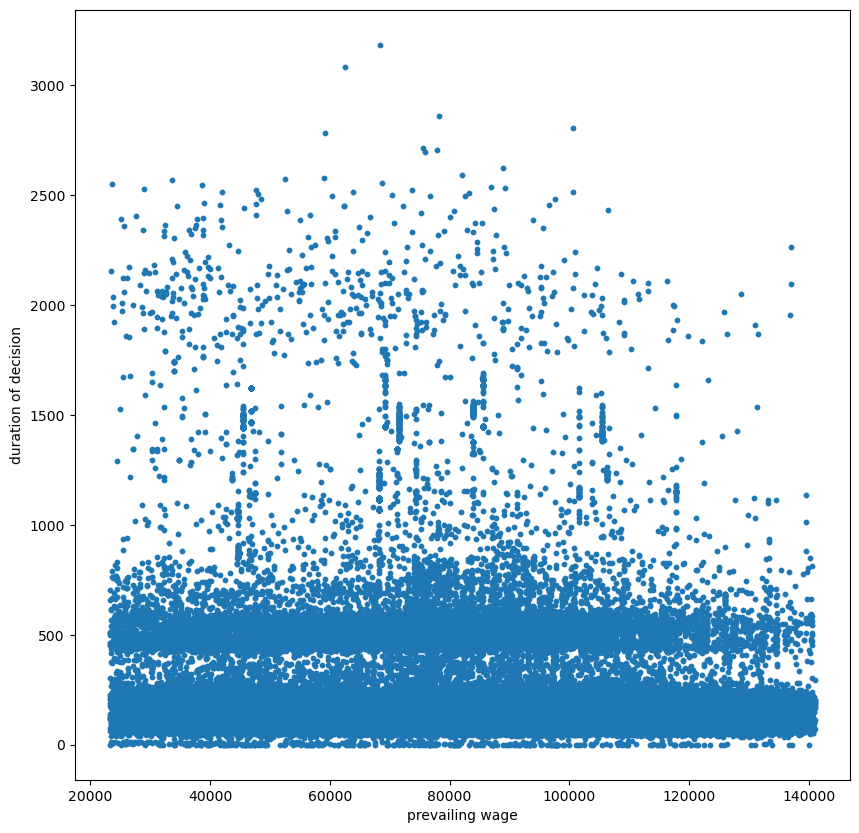

In [157]:
scatdf = wage_duration_df

x = scatdf.prevailing_wage_amount_9089
y = scatdf.duration_of_decision

fig, ax = plt.subplots()
ax.set_xlabel("prevailing wage")
ax.set_ylabel("duration of decision")
plt.gcf().set_size_inches((10, 10))
plt.scatter(x, y, s=10)
ax.set_xlabel("prevailing wage")
ax.set_ylabel("duration of decision")
plt.show()


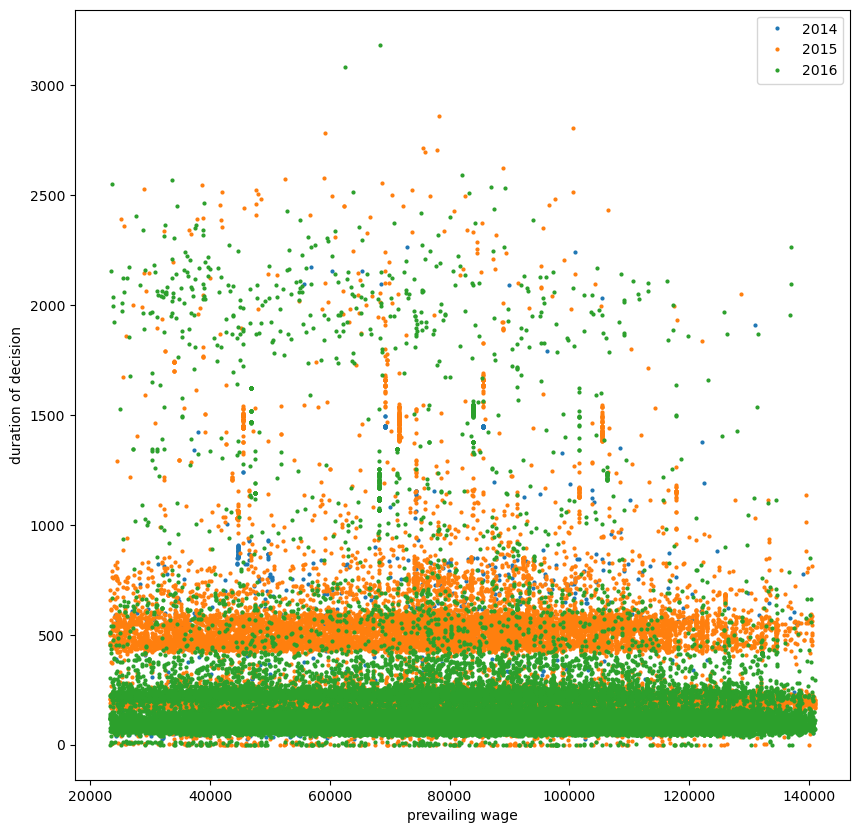

In [158]:
labels = scatdf["decision_year"]
groups = scatdf.groupby(by="decision_year")
df = pd.DataFrame(dict(x=x, y=y, label=labels))

groups = df.groupby('label')


fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=2, label=name)
ax.legend()

plt.gcf().set_size_inches((10, 10))
ax.set_xlabel("prevailing wage")
ax.set_ylabel("duration of decision")

plt.show()

In [159]:
scatdf["decision_date"].dt.year.value_counts()


2016    75830
2015    39935
2014      798
Name: decision_date, dtype: int64

Die Werte von 2014 sind sehr weit gestreut. Zudem aufgrund der geringen Menge nicht repräsentativ.
Diese Werte werden nun vom DataFrame entfernt.

In [160]:
wage_duration_df = wage_duration_df[wage_duration_df["decision_year"] != 2014]


Die Analyse wird durch Ausreißer bei den Bearbeitungsdauern erschwert.
Aus diesem Grund entfernen wir alle Werte der obersten 5% Bearbeitungsdauern.


In [161]:
wage_duration_df = wage_duration_df[wage_duration_df.duration_of_decision.between(0, wage_duration_df.duration_of_decision.quantile(.95))] #

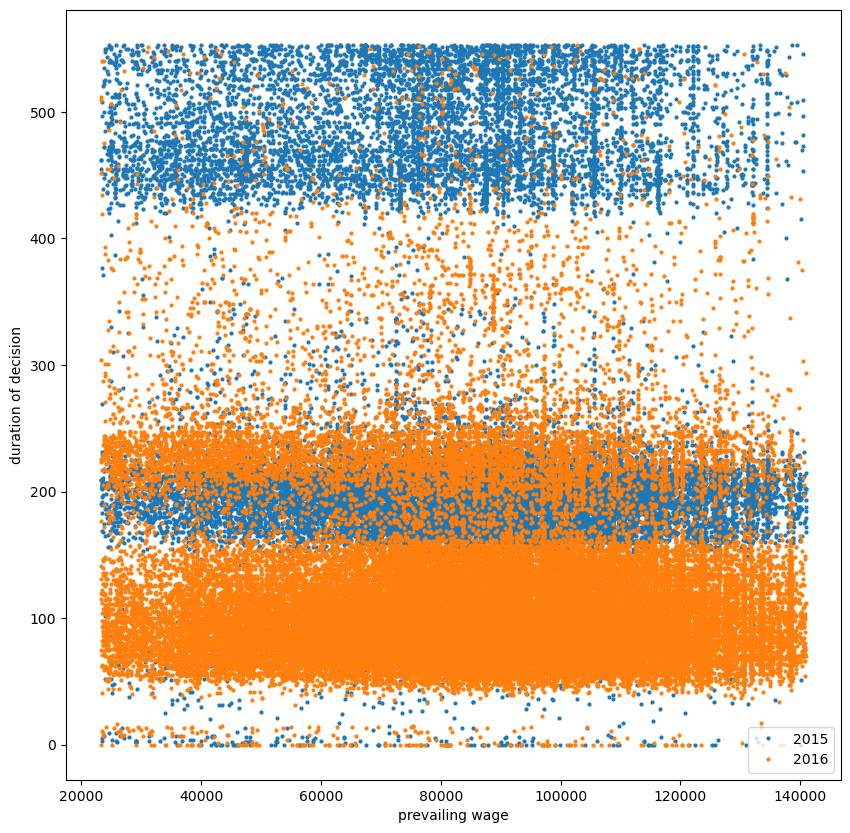

In [162]:
scatdf = wage_duration_df


x = scatdf.prevailing_wage_amount_9089
y = scatdf.duration_of_decision

labels = scatdf["decision_year"]
groups = scatdf.groupby(by="decision_year")
df = pd.DataFrame(dict(x=x, y=y, label=labels))

groups = df.groupby('label')


fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=2, label=name)
ax.legend()

plt.gcf().set_size_inches((10, 10))
ax.set_xlabel("prevailing wage")
ax.set_ylabel("duration of decision")


plt.show()

Interessant sind die erkennbaren Wertverdichtungen bei der Bearbeitungsdauer 200h, 300h und 500h.
Lassen sich diese durch die unterschiedlichen Bearbeitungsergebnisse erklären?


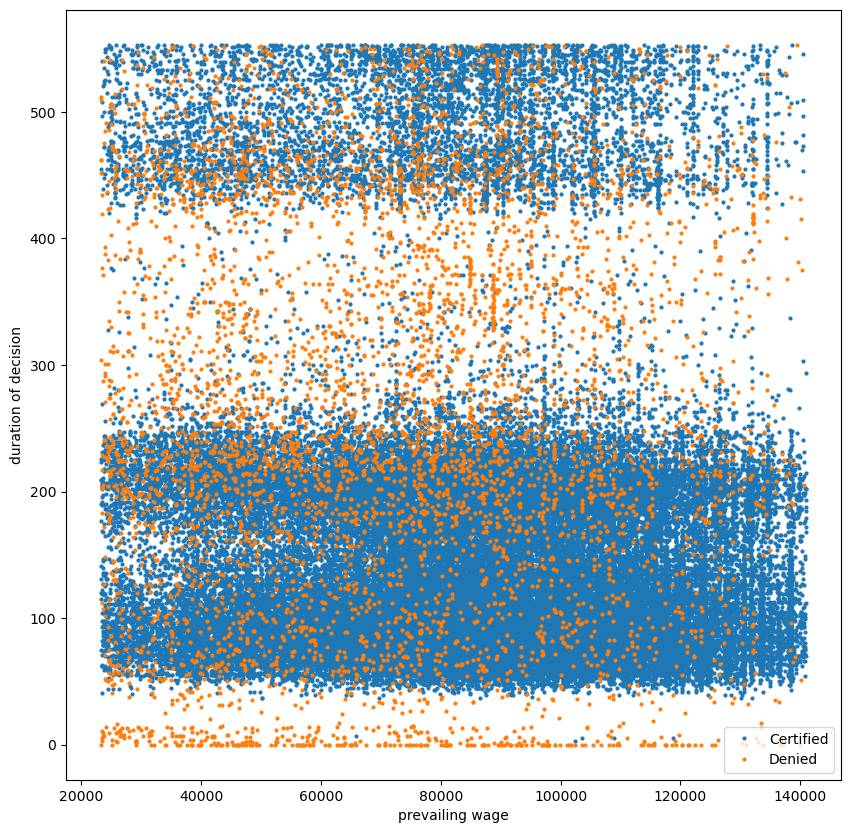

In [163]:
labels = scatdf["case_status"]
groups = scatdf.groupby(by="case_status")
df = pd.DataFrame(dict(x=x, y=y, label=labels))

groups = df.groupby('label')

stats = linregress(x, y)
m = stats.slope
b = stats.intercept
# Plot
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=2, label=name)
ax.legend()
plt.gcf().set_size_inches((10, 10))
ax.set_xlabel("prevailing wage")
ax.set_ylabel("duration of decision")
plt.show()

Nein. Es lässt sich folgendes festhalten:

Es ist kein Zusammenhang zwischen dem prevailing wage und der Bearbeitungsdauer der Visa Anträge erkennbar.
